In [1]:
import urllib.request
import os

In [2]:
url = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"

In [3]:
filepath = "data/titanic3.xls"

In [5]:
if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url, filepath)
    print("downloaded: ", result)

downloaded:  ('data/titanic3.xls', <http.client.HTTPMessage object at 0x7fe64f10cac8>)


In [6]:
import numpy as np
import pandas as pd

In [7]:
all_df = pd.read_excel(filepath)

In [9]:
all_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
cols = ["survived", "name", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]

In [11]:
all_df = all_df[cols]

In [12]:
all_df.head()

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S


In [13]:
df = all_df.drop(["name"], axis=1)

In [14]:
all_df.isnull().sum()

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [15]:
age_mean = df["age"].mean()
df["age"] = df["age"].fillna(age_mean)

In [16]:
fare_mean = df["fare"].mean()
df["fare"] = df["fare"].fillna(fare_mean)

In [17]:
df["sex"] = df["sex"].map({"female": 0, "male": 1}).astype(int)

In [18]:
df_onehot = pd.get_dummies(df, columns=["embarked"])

In [21]:
X = df_onehot.values[:, 1:]
y = df_onehot.values[:, 0]

In [23]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

In [24]:
X_scaled = minmax_scaler.fit_transform(X)

In [26]:
msk = np.random.rand(len(all_df)) < 0.8
df_train = all_df[msk]
df_test = all_df[~msk]

In [27]:
def preprocessData(raw_df):
    df = raw_df.drop(["name"], axis=1)
    age_mean = df["age"].mean()
    df["age"] = df["age"].fillna(age_mean)
    fare_mean = df["fare"].mean()
    df["fare"] = df["fare"].fillna(fare_mean)
    
    df["sex"] = df["sex"].map({"female": 0, "male": 1}).astype(int)
    df_onehot = pd.get_dummies(df, columns=["embarked"])
    
    X = df_onehot.values[:, 1:]
    y = df_onehot.values[:, 0]
    
    minmax_scaler = MinMaxScaler(feature_range=(0, 1))
    X_scaled = minmax_scaler.fit_transform(X)
    
    return X_scaled, y

In [28]:
X_train, y_train = preprocessData(df_train)
X_test, y_test = preprocessData(df_test)

In [31]:
X_train[:2]

array([[0.        , 1.        , 0.00939458, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.0229641 , 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

In [32]:
y_train[:2]

array([1., 0.])

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [35]:
model = Sequential()

In [45]:
model.add(Dense(units=40, input_dim=9, kernel_initializer="uniform", activation="relu"))
model.add(Dense(units=30, kernel_initializer="uniform", activation="relu"))
model.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

In [46]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
train_history = model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=30, verbose=2)

Train on 951 samples, validate on 106 samples
Epoch 1/30
 - 0s - loss: 0.6907 - accuracy: 0.5962 - val_loss: 0.6805 - val_accuracy: 0.8019
Epoch 2/30
 - 0s - loss: 0.6784 - accuracy: 0.6414 - val_loss: 0.6514 - val_accuracy: 0.8208
Epoch 3/30
 - 0s - loss: 0.6441 - accuracy: 0.8023 - val_loss: 0.5890 - val_accuracy: 0.8491
Epoch 4/30
 - 0s - loss: 0.5783 - accuracy: 0.8065 - val_loss: 0.5124 - val_accuracy: 0.8019
Epoch 5/30
 - 0s - loss: 0.5107 - accuracy: 0.8065 - val_loss: 0.4633 - val_accuracy: 0.8113
Epoch 6/30
 - 0s - loss: 0.4706 - accuracy: 0.8097 - val_loss: 0.4355 - val_accuracy: 0.8396
Epoch 7/30
 - 0s - loss: 0.4472 - accuracy: 0.8097 - val_loss: 0.4489 - val_accuracy: 0.8019
Epoch 8/30
 - 0s - loss: 0.4410 - accuracy: 0.8076 - val_loss: 0.4285 - val_accuracy: 0.8396
Epoch 9/30
 - 0s - loss: 0.4343 - accuracy: 0.8149 - val_loss: 0.4251 - val_accuracy: 0.8396
Epoch 10/30
 - 0s - loss: 0.4353 - accuracy: 0.8139 - val_loss: 0.4302 - val_accuracy: 0.8396
Epoch 11/30
 - 0s - los

In [48]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train], label="train")
    plt.plot(train_history.history[validation], label="validation")
    plt.title("Train History")
    plt.xlabel("epoch")
    plt.ylabel(train)
    plt.legend(loc="upper left")
    plt.show()

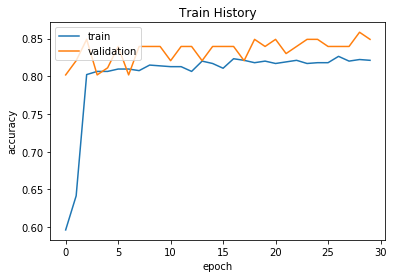

In [49]:
show_train_history(train_history, "accuracy", "val_accuracy")

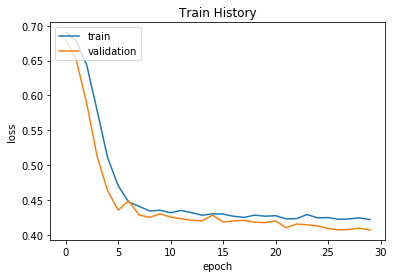

In [50]:
show_train_history(train_history, "loss", "val_loss")

In [51]:
loss, accuracy = model.evaluate(X_test, y_test)

252/252 [==============================] - 0s 16us/step


In [52]:
accuracy

0.7658730149269104

In [53]:
Jack = pd.Series([0, "Jack", 3, "male", 23, 1, 0, 5.0000, "S"])
Rose = pd.Series([1, "Rose", 1, "female", 20, 1, 0, 100.0000, "S"])

In [54]:
JR_df = pd.DataFrame([list(Jack), list(Rose)], columns=["survived", "name", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"])

In [55]:
all_df = pd.concat([all_df, JR_df])

In [56]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [57]:
all_X, all_y = preprocessData(all_df)

In [58]:
all_probability = model.predict(all_X)

In [59]:
all_probability[:10]

array([[0.9640967 ],
       [0.90012836],
       [0.9637118 ],
       [0.28991348],
       [0.96368825],
       [0.14997092],
       [0.9595188 ],
       [0.20717368],
       [0.95912534],
       [0.13187978]], dtype=float32)

In [61]:
all_df.insert(len(all_df.columns), "probability", all_probability)

In [64]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.140126
1,1,Rose,1,female,20.0,1,0,100.0,S,0.963885


In [65]:
all_df[(all_df["survived"] == 0) & (all_df["probability"] > 0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.963712
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.963688
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.964091
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.963767
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.962173
369,0,"Chapman, Mrs. John Henry (Sara Elizabeth Lawry)",2,female,29.0,1,0,26.0000,S,0.927784
381,0,"Corbett, Mrs. Walter H (Irene Colvin)",2,female,30.0,0,0,13.0000,S,0.940665
382,0,"Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...",2,female,NaN,0,0,21.0000,S,0.941598
411,0,"Funk, Miss. Annie Clemmer",2,female,38.0,0,0,13.0000,S,0.923979
445,0,"Hiltunen, Miss. Marta",2,female,18.0,1,1,13.0000,S,0.943400
